# InceptionNet 관련 문헌

In [1]:
# 2014년도 대회에서 우승!!!
# 2014년도에서 다른 등수에 VGG
# ===> 사람들이 GoogleNet많이 사용하지 않을까???
# 사람이 그닥...사용을 안 했음...
# VGG 직관적이고, 구현이 용이함!!!
# 용어 : 초창기 googleNet ---> IncetptionNet ++ Ver Up

In [2]:
# 기존의 일반적인 cnn 설계 방식
# -> conv  - pool
#   + conv 갯수를 늘려가면서 channel은 크게 가져가는 방식


* 초기 버전) https://arxiv.org/pdf/1409.4842.pdf
* Inception V4) https://arxiv.org/pdf/1602.07261.pdf

- GoogleNet이라는 이름으로 초기에는 나왔음
- GoogleNet은 ILSVRC 2014 대회에서 우승을 차지한 모델
--  상위 5개 클래스 기준 오류 6.7% 달성
--  그 이훙 version 4까지 발전을 하였으며
-- `초기 googlenet을 Inception V1`이라고도 함!!

- 전형적인 Conv구조를 탈피하여 네트워크 모듈을 쌓는 방식의 `네트워크 속 네트워크`의 구조 방식으로 설계를 함
- 전체 파라미터의 수가 ILSVRC 2012에서 압도적으로 우승을 한 AlexNet대비 파라미터의 수는 10배 이상 적고, 깊은 신경망을 구성할 수 있는 효율적인 구조
- `구글넷의 네트워크 모듈을 Inception`이라고 하며, 아래 그림에서 보이는 부분을 Inception Module임! (논문 참조)



<img src="https://drive.google.com/uc?id=1i6JQXgdH2JI_grwyi6U_hX2dGt3G6_eN">

# 기본 설계 원리

* Sparsity & Density
    + Sparsity : 극히 일부 구성 요소 사이에서만 상호작용이 일어남
    + Density : 대부분의 구성 요소 사이에 상호 작용이 일어남
        + 인공신경망 관점 : 완전 연결Full Connection보다도 상관성이 있는 출력끼리 연결된  `희소 연결 구조를 갖는 편이 훨씬 효율적`일 것임
        +HW 관점 : 연산 효율의 측면에 있어서는 `조밀성을 가지는 구조가 훨씬 효율적`일 것임.
* Inception Module : 인공신경망의 성능과 컴퓨팅 자원의 효율성을 높이기 위한 `희소 연결 구조`를 가지면서, 동시에 HW적인 연산 효율을 위해서 `조밀 연산`구조를 하도록 설계가 되어 있음!



<img src="https://drive.google.com/uc?id=1i6JQXgdH2JI_grwyi6U_hX2dGt3G6_eN">

* 4가지 역할
    + 1 X 1 Conv : 채널 특징 인식
    + 3 X 3 Conv : 서로 다른 크기 특징 추출
    + 5 X 5 Conv : 서로 다른 크기 특징 추출
    + 3 X 3 MaxPool : 가장 두드러지는 특징 인식
* 대략적 컨샙 : 여러 사이즈를 가진 Conv를 통과 시켜서 나온 FeatureMap을 Concat해서 쌓아서 하자!! ==> 이 부분에서 `쌓기 위해서는 모양을 잘 맞춰`야 함!!! ( 논문에서 stride는 1로 고정하고, padding을 컨트롤 하면서 하였다고 함)

* 아래 기본적인 inception module에 대해서 가지는 문제점
    - 아래 그림과 같이 28X28X192가 들어가서 나오는 결과는 28X28X(192+128+96+256) 으로 672개의 chanel이 생성이 됨;;;;
    - 채널이 약 256에서 672개로 2.5배 정도 늘어남
    - 결론: 가장 문제점은 바로 보이는 채널의 수가 과도하게 증가하는 현상이 나타남! ==> 이는 연산량의 증가를 야기하게 됨!!!

<img src="https://drive.google.com/uc?id=1PaKN4xBknGJ9tp6gfw4xMBosj4LtS61O">

In [3]:
# --> 아래 그림과 같은 대안을 제시를 함 : 중간 병목측 추가

* 위의 개선된 방법의 핵심은 중간에 `Bottleneck layer`를 추가를 하는 것임!!!
    - 채널의 수 감소
    - 그로 인한 연산량 감소

<img src="https://drive.google.com/uc?id=1ur1w2Y2Gy8wMYa_wAevb9mOAT6V6RIw3">

# 모델의 구조

<img src="https://drive.google.com/uc?id=10ppxqEc6PWlVqdEggbZmdfTWnuAGiKPg">

<img src="https://drive.google.com/uc?id=1PxeMPx7h6wYhj4-KdXYMZh6IMZwlZuyB">

<img src="https://drive.google.com/uc?id=1o0VD0pCJ2VT7p0gceMb2ftoHAI0IgUYl">

* 위의 그림을 보면 알 수 있듯이
    - stem : 신경망의 도입부로 Copnv/Pool로 구성이 됨 --> 초기에는 인셉션의 효과가 없어서 일반적인 Conv로 구성
    - Body : inception module 9개 쌓음( 중간 그림의 3(a) ~ 5(b)까지, 1/3/8번째에는 inception 전에 maxPool사용해서 FeatureMap의 크기를 줄임
    - Final Clf : 완전 연결 FC을 사용하는 것 대신에 AvgPool을 사용해서 파라미터의 수 줄임
    - 보조 분류기 auxliary Clf : 2개의 보조 분류기를 사용 --> 하위 계층에 경사도를 원할히 공급 & 정규화 역할을 함.( 훈련에서만 사용하고, Test에서는 사용하지 않음!!)

* 보조 분류기 : 깊어지면서 발생을 하는 Gradient Vanishing 문제를 해결하기 위해서 중간에서도 BackPropagation을 시도하기 위해서 한 계층임.
* 참고 : InceptionNet V2이후 부터는 별로 큰 효용이 없어서 1개 줄이다가 V4에서는 사용하지 않음!

In [4]:
# 아래는 그 당시 ver1의 성능표(논문)

<img src="https://drive.google.com/uc?id=1F5v9ctAanT21YcsMwuKbKdwchYsr6RHH">

* 위의 표들은 그 전까지의 대회에서 수상한 모델들의 성능을 중심으로 표현하고 있는 것
* 7개의 모델( 앞의 모델과 동일한 사이즈 6개 + 1개 큰 모델)을 앙상블을 함
* 여러가지 resize를 하고, crop을 해서 진행을 하였다고 함 ==> 제일 best는 1장의 사진을 144개의 이미지로 crop/resize를 통해서 7개의 모델을 통해서 앙상블한 것이 제일 Best!!!!
*

# 결론
- 여러 사이지의 필터를 통과한 FeatureMap을 합쳐서 Channel로 사용함
- 1X1 Conv로 파라미터의 갯수를 좀 줄여서 처리함
- V1은 auxiliary clf가 있어서 Gradient Vanishing을 상쇄하려고 하였지만, 이후 모델에서는 이 부분을 줄여나감

In [5]:
# 줄인다고 줄인거 같지만,,,구조가 복잡해..
# ==> VGG보다 복잡하네...성능도 1/2 별로 차이 없는데,,
#     편하게 하지 뭐...
# ==> ver1 핵심 : conv 1*1 --> Channel을 컨트롤 하자!!!
#                + FM의 Channel에 대해서 다양한 특성을 반영시키자!!
#                       (1*1, 3*3, 5*5, MP)
#                             --- 3*3, 5*5 앞에서 1*1 미리 줄이고...

# Inception Version 2/3

* ref) https://arxiv.org/pdf/1512.00567.pdf
* 사람들이 여전히 자신들이 1등을 하여도 VGG를 많이 사용하기에, 자신들이 모델의 파라미터도적고 한데 왜 VGG만 사용하나에 대한 복기로 시작
* 개선방법1
    - 5X5 Conv 1번 연산이 3X3 Conv 를 2번 사용한 것 대비 연산이 약 2.78배 더 많이 사용함( 25 / 9 = 2. 78 )

<img src="https://drive.google.com/uc?id=1R91kPopUInjEAQZ23dcPpp-TSDxXnxSO">

<img src="https://drive.google.com/uc?id=1vmEOmLdKqaHCrAbN6PwpS21IsJ051xtd">

* 개선방법2
    - 비대칭을 활용
    - N X N Conv에 대한 것을 연산을 줄이기 위해서 1 X N Conv + N X 1 Conv로 처리함
    -

<img src="https://drive.google.com/uc?id=1lwpZXa1aYiRJiGmGGawXciacSkScqZwY">

<img src="https://drive.google.com/uc?id=1YDpheAwHcDkRPvVabXJ-suDWDTOFFD0l">

* 개선방법3
    - `Conv + Pool 이나 Pool + Conv 나 결론적인 부분은 동일`한데,,이 것을 `어떤 순서로 할까의 문제`가 발생함 ==> 아래 그림에서 왼쪽은 Pool먼저, 오른쪽은 Conv먼저
    - 효율적인 크기 줄이기 : 아래 그림에서 너무나 Pooling을 해서 35X35X320을 17X17X320으로 하게되면,  Representational Bottleneck( 입력 정보 확 줄어버리는 것 )이 발생하게 됨!!
    - 오른쪽으로 같이 변경을 하게 되면, 정보가 줄어드는  Representational Bottleneck은 피할 수 있지만 연산량이 엄청 증가를;;;
    - 결론 : 아래 그림과 같이 stride=2로 한 결과를  concat하자로 ==> inception과 pooling을 동시에 수행!

<img src="https://drive.google.com/uc?id=14Shr8mQhgO5lIvw65b4cW4SUU1yLUp-k">

* 개선방법4
    - Auxiliary CLF 에 대해서는 Version1 대비해서 1개만 사용을 하도록 수정
    - 1개에는 BatchNormal을 적용

<img src="https://drive.google.com/uc?id=16eOG1XUeQoheoeSaY_iSKqX7gnWf0kuA" >

* 참고) 위의 사항들을 반영해서 사람들이 직접 구현을 한 것들은 이런 기본 구조에서 조금씩 다르고, 맨 아래 표시한 것을 V3이라고 함

<img src="https://drive.google.com/uc?id=1bmEAYWEePyBcQWsEoqK7NL7Q67BJvkYp">

In [6]:
# Version2의 핵심 : 3*3 ==> (3*1) * ( 1* 3) 쪼개서 연산량을
#                   대략 30% 정도 줄이자!!!
# 아이디어는 : 인수분해
# 일반적으로 주로 이야기하는 버전은 inception V3 를 중심으로

# 예제 적용

In [7]:
# 견종 데이터 셋
#https://www.kaggle.com/c/dog-breed-identification

In [8]:
# 구글드라이브에 있는  파일에 대한 id를 가지고
# colab에 다운로드 함..
# 이것을 실행하면
# colab의 content에 train.zip, test.zip
!gdown https://drive.google.com/uc?id=1szLijK-O-QT5LA9ytCPassTtxMg-uJ_y
!gdown https://drive.google.com/uc?id=1z3n7y7RQKlseNBpb4XoRLKjTQGd8pExH

Downloading...
From (original): https://drive.google.com/uc?id=1szLijK-O-QT5LA9ytCPassTtxMg-uJ_y
From (redirected): https://drive.google.com/uc?id=1szLijK-O-QT5LA9ytCPassTtxMg-uJ_y&confirm=t&uuid=a5444d0c-989e-48d8-8853-875e51a38120
To: /content/train.zip
100% 361M/361M [00:06<00:00, 53.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1z3n7y7RQKlseNBpb4XoRLKjTQGd8pExH
From (redirected): https://drive.google.com/uc?id=1z3n7y7RQKlseNBpb4XoRLKjTQGd8pExH&confirm=t&uuid=2c1f7809-178b-4b5a-96c8-8b6f66d6e6cc
To: /content/test.zip
100% 363M/363M [00:04<00:00, 88.6MB/s]


In [9]:
# 샘플 submission, labels.csv 파일 다운로드
!gdown 1Iq0uGTax-qpAQbjdYrFPEJivoFLFc0bR
!gdown 1kKSzJISTf06tVccOwAC-1HEsdHzFKuwS

Downloading...
From: https://drive.google.com/uc?id=1Iq0uGTax-qpAQbjdYrFPEJivoFLFc0bR
To: /content/sample_submission.csv
100% 25.2M/25.2M [00:00<00:00, 165MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kKSzJISTf06tVccOwAC-1HEsdHzFKuwS
To: /content/labels.csv
100% 482k/482k [00:00<00:00, 143MB/s]


In [10]:
# colab에서 zip파일 푸는 여러 방식 중에 간단히 unzip
# zip 파일을 푸는 과정 : unzip -qq 풀려는대상 -d 압축풀경로
!unzip -qq "/content/train.zip" -d "/content/train/"

In [11]:
!unzip -qq "/content/test.zip" -d "/content/test/"

In [12]:
# 제대로 풀렸는지 확인!!!!!
import os
import glob
# --> 운영 체제 내에서 관련 파일 접근, 정보 etc

In [13]:
len(list(glob.glob("/content/train/*.jpg")))

10222

In [14]:
len(list(glob.glob("/content/test/*.jpg")))

10357

In [15]:
# ---> 뒤에 모델을 활용해서 적용을 할 때는..
#      폴더 구조로 학습을 시킴!!!!
# train폴더 안에 sub폴더명이 정답지의 이름으로 구성...
#                sub폴더안에 원하는 데이터의 이미지들이 있어야 함!!!

# 예)
# train/~~~.jpg, ~~~.jpg ,,,,,,,,,,, [지금 구성]
# train/진돗개/1111.jpg, 2222.jpg , 3333.jpg etc
# train/요크서/99.jpg, 11003.jpg
# --> 정식적인 데이터셋들은 주로 이런 식으로 구성해서 배포
#     kaggle은 대회에 따라서 양식은 그 때 그 때 달라요....

In [16]:
# 폴더 세팅 : train/test org
# ---------> 새로운 경로에 하위 폴더를 종별로 선별해서 생성..
# 저는 코드상 편의를 위해서..그냥 복사를 선택하겠습니다.(이동)

train_data_folder = "/content/train/"
test_data_folder  = "/content/test/"

# train --> 종류별로..
train_data_sub_folder = '/content/train_sub/'
# valid나, test에 대한 정답을 안다면,,,
#test_data_sub_folder = '/content/test_sub/'

In [17]:
# 정답에 대한 파일 label.csv 파일을 불러와서
# 여기에 있는 기준대로 폴더도 생성하고, 파일도 복사!!!
# ===> 파일 정리의 기준!!!!!!
# 참고) csv 파일이니..pandas
import pandas as pd

In [18]:
label_path = '/content/labels.csv'
label_text = pd.read_csv(label_path)
label_text.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [19]:
# 체크1) 학습할 데이터의 견종의 수
len(label_text.loc[:,"breed"].unique())
# --> 문서에 있는 120견종에 대한 부분이 일치!!!!

120

In [20]:
# 체크2) 각 종류별로 균형이 맞는지,,,안 맞는지....
# ==> 견종별로 몇 장이 데이터가 있는지 체크....
label_text.loc[:,"breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

In [21]:
# ===> 견종별로 완벽하게, 엇비슷하게 데이터가 있지는 않음!!!!!
#      통일되게 66장으로 하겠다...
#               데이터증강을 통해서 120장으로 하겠다....
#      .... 선택들을 하셔야 함!!!!!!!!
#      +++ 시간적인 요소!!!!!
#      +++ 코드적으로 데이터 증강을 하면 오히려 방해가 될 수 있음.
#          ( 적당하게 셋을 생성을 해야 함 !!!!)

In [22]:
# 체크3) 이미지 파일의 수 == 정답지의 수 체크.....
len(list(glob.glob("/content/train/*.jpg")))

10222

In [23]:
glob.glob("/content/train/*.jpg")[:3]

['/content/train/a5c6ca31780472bc6297dcb230ba8d0d.jpg',
 '/content/train/566adbe64cf98307231658cb834cffb7.jpg',
 '/content/train/d4282be98a29612cbe5b01173e99f704.jpg']

In [24]:
len(label_text)

10222

In [25]:
# ==> 10222장의 이미지들을 정답지를 반영해서
#      하위 폴더 구조로 변경을 하면 됨!!!!!
# 대상 : glob.glob("/content/train/*.jpg") 이미지 리스트들만..

In [26]:
# 데이터 탐색...
# 이미지 데이터에 대한 탐색.....시각화
import matplotlib.pyplot as plt
# 1) matplot
# 2) opencv
# 3) tensorflow~~~image
# 본인이 했던 코드 재활용, 검색해서 나오는거 복붙...

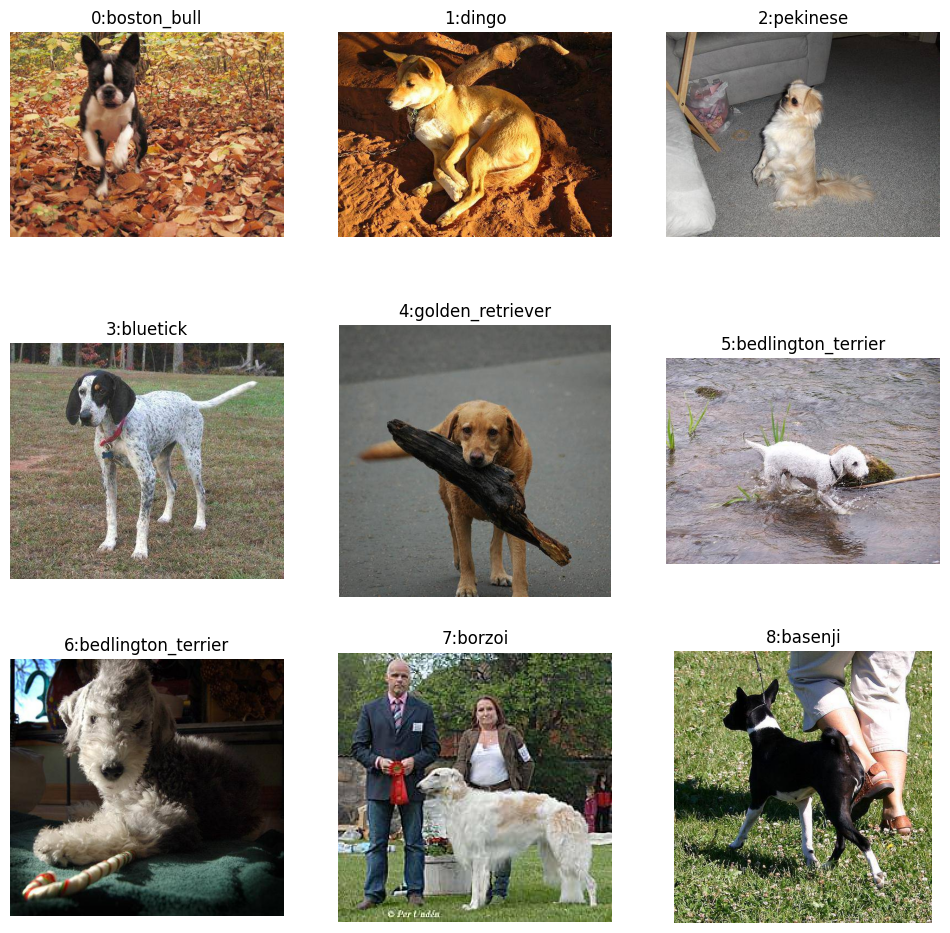

In [27]:
plt.figure( figsize=(12,12))
# --> 임의로 train 폴더에 있는 9개를 가지고 와서
#     탐색을 해보겠습니다...
for c in range(9): # 숫자를 쓴 이유는 sub-plot에 그릴려고...위치
    # 정답 df에서 해당 id를 가지고 오겠음...
    # ---> id.jpg를 붙여서 이미지를 땡겨오려고 함...
    image_id = label_text.at[c,"id"]
    image_breed = label_text.at[c,"breed"]

    # 9개 그리기 위한 그림에 대한 위치...
    plt.subplot(3,3,c+1)

    # train 폴더에서 해당하는 image_id 이미지 파일을 가져와야 함...
    image_file = train_data_folder + image_id + ".jpg"
    plt.imshow(plt.imread(image_file))
    plt.title(str(c) + ":" + image_breed)
    plt.axis("off")
plt.show()

In [28]:
# EDA를 통해서....
# 1) 일단 종에 대한 부분에서 색상 : 흑백은 좀..... 최대한 컬럼
# 2) 배경이 상당히 다양함 ==> 견종에 대한 특징과
#                             배경에 대한 특징이 혼재!!!
#    +++ Segmenation(다른 모델을 도움을 받아서..SAM)
# 결론) 최대한 컬러를 유지하면서 하는게 어떨까!!!
#       빠르게 뭔가 해보고 싶으면,,,Gray스케일로 줄여서,,,
#       선택을 하면서!!!!

In [29]:
###############
# 내가 직접 만들어서 할 수도 있지만,,,,,
# 기존에 이미 잘 학습된 모델을 그대로 가지고 와서
# 수정해서 사용하자!!!!!
# ===> 사전 연구들을 조사를 하는 것!!!!
################

In [30]:
# 학습을 하려고 보니 폴더 구조가 문제가 됨!!!
# ===> 종별로 하위 폴더 구성을 하려고 함!!!!
import os
import time
# colab에서 할 때 : 파일 복사 등...
import shutil

In [31]:
# 파일 정리
# 1) train_sub 폴더가 없으면 생성해주세요!!!!!
train_data_sub_folder_name = os.path.dirname(train_data_sub_folder)
# 혹시 없는 폴더면,,폴더 생성해주세요...os.mkdir
if os.path.isdir(train_data_sub_folder_name) ==False:
    os.mkdir(train_data_sub_folder_name)

# 2) train_sub폴더가 생성 되었으면,,,
#     --> 정답지에 있는 파일들을 돌려가면서
#         해당하는 종에 대한 하위 폴더가 없으면
#             --> 폴더 생성
#             --> 그 이미지 복사
#         해당한느 종에 대한 하위 폴더가 있다면,,
#             --> 그 폴더 위치만
#             --> 그 이미지 복사.

In [32]:
for i in range(len(label_text)):
    # 각 데이터에서 이미지에 대한 id, 견종
    image_id = label_text.at[i, "id"]
    image_breed = label_text.at[i, "breed"] # 하위폴더명,체크/사용

    # 견종별 하위 폴더에 대한 경로를 조립...문자열
    if os.path.exists( train_data_sub_folder+image_breed)==False:
        os.mkdir(train_data_sub_folder+image_breed)
    # ==> 정답지를 보고,,,하위 폴더가 없으면 생성....

    # 기존에 train 폴더에서 다른 폴더내에 있는 서브 폴더로 이동.
    # 복사 : 무엇을 ---> 어디로 복사.
    # /content/train/1111.jpg
    #  ---> /content/train_sub/도사견/111.jpg
    shutil.copy( train_data_folder + image_id+".jpg",
                 train_data_sub_folder+image_breed )


In [33]:
# 참고) 동일한 위의 코드인데,,,,
#       기준이 되는 폴더가 구글 드라이브에서 하면,,,
#       시간이 엄청 걸리니...최대한,,,colab 해결을하세요!!!

In [34]:
# 체크) 내가 생성한 하위 폴더의 수가 정답 종류인 120개 맞냐..
len(os.listdir(train_data_sub_folder))

120

In [35]:
# ===>
# 1단계 : 단순히 입력을 위한 폴더/ 파일 구조만 변경을 함!!!!

In [36]:
# 2단계 : 이 파일 구조를 기반으로 모델에 전달할
#         generator를 만들어야 함!!!!

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [38]:
# 참고 링크 : https://keras.io/api/applications/
# ---> 내가 어떤 모델을 차용해서 사용할지 정할 수 있음!!!
# ++++ yolo(여러 이미지 관련 최신 모델들을 배포... )

# ===> 입력을 변경을 할 수는 있는데,,,기존은 224,224
# +++ 기존 모델과 내 모델의 목적이 다름!!!
# 기존 : 1000가지 이미지 분류
# 나의 튜닝 : 강아지 중심 120이미지 분류!!!
# ===> 뒤에는 수정을 해야함!!!!

In [39]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input

In [40]:
# 내가 차용할 모델은 InceptionV3선택!!!
# --> 다양한 이미지들에 대해서 학습한 ImageNet 셋으로 학습한 것을
#     차용하겠다...( 다양한 이미지들의 특성을 잘 뽑겠지!!!)
# 다만, ImageNet 셋이 1000종류로 분류
# ==> output 수정을 해야할 듯!!!!!

# include_top : 뒤에....출력쪽이 1000가지 분류를 하면 사용할 수 있고
#               우리 목적은 120개로 튜닝을 해야해서...
#               이 부분은 빼고 가져고 옴!!!!!

# 원래는 224,224,3학습을 했지만,
# input~~ 지정하지 않아서 X,X,3 (컬러이미지)
# ===> 뒤에서 generator쪽에서 이미지 크기도 조정해서
#      model에 전달할 예정!!!!!

In [41]:
base_model = InceptionV3(weights='imagenet', include_top=False)
base_model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

In [42]:
from tensorflow.keras.utils import plot_model

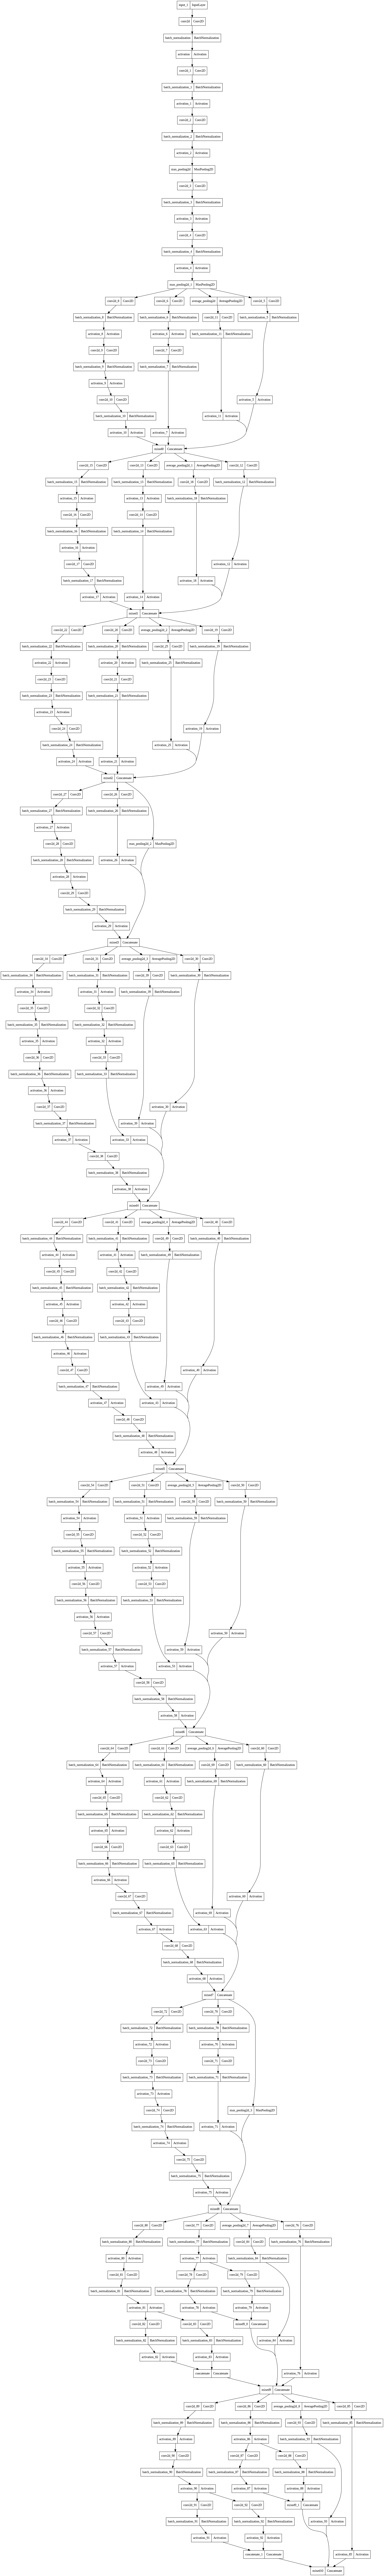

In [43]:
plot_model(base_model, show_shapes=False )

In [44]:
# 잘 학습된 모델 구조와 가중치를 가지고 옴!!!
# 활용방식은 여러개 존재함!!!

# m1) 애가 잘 했을 꺼야,,,그냥 쓰자!!!!!
for layer in base_model.layers:
    layer.trainable = False
# 특징 추출에 대한 것들은 오로지 기존 모델로 사용하고,,,
# weight는 내 데이터로 변경하지 말자!!!!
# ==> 뒤에 분류만 나의 데이터로 학습하면서 최적화하자!!!
#     학습할 weight의 수가 확 줄어듬!!!!

In [45]:
# m2) 구조는 좋으니까..내것으로 처음부터 끝까지 다
#     다시 학습하자!!!!
for layer in base_model.layers:
    layer.trainable = True
# ====> 좋기는 함...
#       데이터와 학습의 시간이 문제!!!!!!!!

In [46]:
# m3) 앞에는 일반적인 이미지들에 대한 특징을 추출할테니
#     믿고 가는 것이고,,,
#     중간에 특징을 뽑아내는 레이어들은 나의 강아지 데이터로
#     학습을 하자!!!!
#     inceotion에서 2번째 덩어리.....249...
for layer in base_model.layers[:249]:
    layer.trainable = False
for layer in base_model.layers[249:]:
    layer.trainable = True

In [47]:
# ===> 내가 취사선택할 수 있는 옵션들!!!!!!
#      기존에 잘 학습된 모델을 어떻게 활용할지에 대한
#      활용방안도 고민을 해야 함!!!!!
# 참고) 여기서는 시간 관계상 분류만 학습을 시키겠습니다..
for layer in base_model.layers:
    layer.trainable = False

In [48]:
# 나의 목적에 맞도록 모델 구조를 수정!!!!
# 1) 앞단의 부분..... DataGenetrator~~
# 2) 출력층 : 견종120개로 세팅!!!!

In [49]:
# 최종 출력에대한 종류
num_classes = len(os.listdir(train_data_sub_folder))
num_classes

120

In [50]:
# 기존의 불러온 모델의 최종단을 수정!!!
# --> 기존 모델의 아웃풋을 가지고 와야 함..
x = base_model.output
print(x)
print(x.shape)

KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 2048), dtype=tf.float32, name=None), name='mixed10/concat:0', description="created by layer 'mixed10'")
(None, None, None, 2048)


In [51]:
# 모델 설계에 필요한 모듈을 가져다가...
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D ,Dropout, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation , Conv2D
from keras.applications.inception_v3 import preprocess_input
from keras import optimizers

In [52]:
# 뒤에 출력에 대한 분류에 대한 네트워크는 없었음...
# ===> 좀 구성을 하려고 함!!!!! 120종 분류에 맞춰서..
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense( 1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense( 1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense( 512, activation="relu")(x)
####---> 분류에 대한 네트워크 설계 : 함수적인 in/out
# 출력층에 대한 설계
pred = Dense(num_classes, activation="softmax")(x)

# 전체적인 모델을 조립!!!!
# in : None, None, None, 3
model = Model( inputs= base_model.input,
              outputs= pred)

In [53]:
# ....to do
# 1) compile
# 2) fit ---> data generator로 밀어넣는 설계
#             (이미지 증강, val, 이미지사이즈 etc )

In [54]:
# 참고) optimizer -> 수정
# adam 에서 나온 lr = 0.001 보통은 이야기를 함
my_adam= optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
# -> optimizer 에서도 여러 옵션이 있음
#   가장 크게 lr
#   그 다음에 여러 옵션들이 영향을 미침

# 모델을 어떻게 학습할지에 대한 compile
# 참고) 우리의 목적은 크게 분류 -> output layer 에서 라벨 인코딩 : sparse ~~
                                                    # 원 핫 인코딩 : ~~
# 참고) 정답지를 하위 폴더 구조로 입력을 하는 경우에 있어서는 loss를 어찌 세팅?
  # -> 원 핫 인코딩은 안 해도 loss에 일반적인 categorical~
  # (sparse 를 안 붙여도 된다!)
  # -> 데이터를 밀어 넣는 방식에 따라서 설정들이 조금씩 다름
model.compile( optimizer=my_adam,
              loss = "categorical_crossentropy",
               metrics = ["accuracy"]
              )
# --> 일단 했던 양식 그대로 하기 위해서..기존의 accuracy로 모니터링을 함..
# 참고) 대회는 log-loss로 결정을 함..
#       이 지표로 모니터링을 하던가,,,,,유사 지표로 모니터링을 하면 됨...
#       없으면,,,만들어서 해야함!!!!( 실제는 만드는 경우가 좀 있음...)

In [55]:
# ===> 데이터를 폴더에서 모델로 넘겨주는 Generator를 생성!!!!
# ++++ 전처리, 이미지 보충, etc
# 컬러의 값 : 8비트0~255, 10비트0~1023 etc --> 정규화

In [56]:
# 사전 체크 : 데이터의 픽셀 값 크기
# -> 편한 여러가지의 사용하며 ㄴ됨
import cv2

temp_path = "/content/train_sub/affenpinscher/00ca18751837cd6a22813f8e221f7819.jpg"
temp_img = cv2.imread(temp_path)
print(temp_img.shape)
print("최소", temp_img.min())
print("최대", temp_img.max())

(338, 450, 3)
최소 0
최대 255


In [57]:
# 참고2) 이미 학습된 모델을 가지고 와서 진행
# 이미 전처리들을 수행을 함
# 혹시 inception v3가 수행한 전처리를 그대로 사용하려면
# preprocess_input 을 사용하면 됨
# from keras.applications.inception_V3 import

In [64]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [65]:
# 데이터를 생성하는 생성기를 만들려고 함  + 전처리
# -> 다양하게 하면, 시간이 오래걸릴 수 있음(데이터 보충 : 주의해서)
train_datagen = ImageDataGenerator(
    # 기존 모델 inceptionv3 가 하려는 거 그대로 사요하면,
    # preprocessing_Function = preprocess_input

    ####### **** 공통
    validation_split = 0.1,
    rescale = 1./255, #무조건 모든 경우에 다 적용할 거임.

    #### 데이터 보강
    rotation_range=  40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,

    ## zoom range, 반전,,,,빵구난 데이터
    fill_mode = "nearest"
)

# -> 학습용에 대한 데이터 뽑아내는 생성기의 옵션
# -> 데이터 증강도 사용할 수 있고, 전처리도 사용할 수 있음
# -> 너무 많이 세팅하면, 다양하게 학습은 하지만, 시간이 문제가 될 수 있고,
#   이상한 데이터가 들어가서 오히려 성능이 떨어질 수 있음
# -> 다양하게 세팅

# 중간에 검증용, 평가하는 게 목적, 이미지를 보강할 필요는 없음!
# validation 생성기를 따로 생성을 하려고 함
# -> 최소한의 분리에 대한 세팅 & 전처리
# 이미지 보강은 전혀 사요 x(만약에 하면, 성능이 엄청 떨어짐)
valid_datagen = ImageDataGenerator(
    validation_split =0.1,
    rescale = 1./255
)

In [66]:
# 밑에서 생성할 때 공통적으로 필요한 정보
# 1) 이미지 사이즈 지정 : 299 ---> 299, 299 ( 본인의 선택 )
image_size = 299
# 2) batch_size 지정  : GPU의 vRAM에 체크하면서,,,,16~1024
batch_size = 16

In [67]:
# --> 구체적으로 어디서 뽑아서 사용할지에 대한 세팅!!!!!
#     생성기 + 출처(size, batch_size, class_mode etc)
#     train/valid 따로 처리....
train_generator = train_datagen.flow_from_directory(
    # 1장에 대해서 뽑아낼 때의 옵션...
    # 1) 어디서 뽑을 꺼에요...
    train_data_sub_folder,
    # 2) 이 셋에 대한 용도 지정
    subset = "training",
    # 3) 입력에 대한 모양을 여기서 지정을 함...(선택)
    target_size = (image_size, image_size),
    # 4) 기타옵션..
    seed = 42, shuffle = True,
    batch_size = batch_size,
    class_mode = "categorical"
)
# val : 따로 설정을 해서 넘겨야 함..
#       train과 다르게 여러 데이터 증강은 빼고 진행을 함...
#       이거 넣어서 그냥 복붙하면,,이상한 사진도 평가를 해야해서
#       성능 지표가 이상하게 낮게 나타남!!! 주의해서!!!!!
valid_generator = valid_datagen.flow_from_directory(
    # 어디서 가져올 것인가..
    train_data_sub_folder,
    # 용도
    subset="validation",
    # 3) 입력에 대한 모양을 여기서 지정을 함...(선택)
    target_size = (image_size, image_size),
    # 4) 기타옵션..
    seed = 42, shuffle = False, # 단순 평가인데,,굳이 순서가???
    batch_size = batch_size,
    class_mode = "categorical"

)

Found 9254 images belonging to 120 classes.
Found 968 images belonging to 120 classes.


In [68]:
# +++ 부수적으로 학습할 때 callback
# cp_path = "training/cp-{epoch:04d}.ckpt",
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     cp_path,
#     verbose = 1,
#     save_weights_only=True
# )
# es_callback = tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     patience = 3
# )

cp_path = "training/cp-{epoch:04d}.ckpt"
cp_dir = os.path.dirname(cp_path) # training
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    cp_path,
    verbose = 1,
    save_weights_only = True
)
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience = 10 # 참을 횟수...갱신이 안 되는 횟수..
)


In [69]:
# 참고
int(train_generator.n / batch_size)

578

In [ ]:
#  +++ 학습을 진행하는 과정에서...
# epochs 동일한데,,,
# steps_per_epochs =
# 기존에는 m.fit( X_train, y_train, validation_split, epoch, batch_size~~~)
my_steps_per_epoch = int(train_generator.n / batch_size)


history = model.fit_generator(
    # 학습할 용도의 제너레이터
    train_generator,
    # 중간 평가용의 제너레이터
    validation_data = valid_generator,

    # epochs 지정....
    epochs = 50,

    # 체크...: batch_size X ==> steps_per_epoch
    steps_per_epoch =my_steps_per_epoch ,

    # callback
    callbacks=[cp_callback,es_callback],

    ####### Use multiprocessing
    # ---> 최대한 자원을 끌어다 사용을 하는 것..n_jobs =- 1
    #      장점은 가용자원 끌어다 사용하지만,,,
    #      colab에서는 중지가 잘 안되는 현상이 발생을 함....
    # ---> 완전히 처음부터 다시 해야하는 상황들이 종종 발생을 함..
    # use_mulitprocessing=True
)

<ipython-input-70-91a6a6f88fae>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
578/578 [==============================] - ETA: 0s - loss: 2.3161 - accuracy: 0.4388
Epoch 1: saving model to training/cp-0001.ckpt
578/578 [==============================] - 194s 316ms/step - loss: 2.3161 - accuracy: 0.4388 - val_loss: 0.7466 - val_accuracy: 0.7624
Epoch 2/50
429/578 [=====================>........] - ETA: 46s - loss: 1.1966 - accuracy: 0.6592

In [ ]:
# To Do List ( 과제 )
# --> 실제 모델링을 해서,,,kaggle에 직접 업로드를 해서 평가를 해보세요!!!
# --> 제일 성능이 높은 신 분은....뭔가 있겠죠!!!!!!!!

# 해야할 것 : 직접 기존 모델들을 가지고 학습하는 방법을 연습
# + 내일 : 저장을 해두시고
# test를 어떻게 풀고, 어떻게 업로드 할지 ( 하는 방식들이 여러개가 있어서 )

# 설명을 위해서 코드를 불편하게 자르는 경향이 있음
# -> 스타일대로 코드만 정리해보기

# yolo 로 이용해서 할 때 kaggle 업로드로 해보겠음